In [1]:
import numpy as np
import matplotlib.pyplot as plt

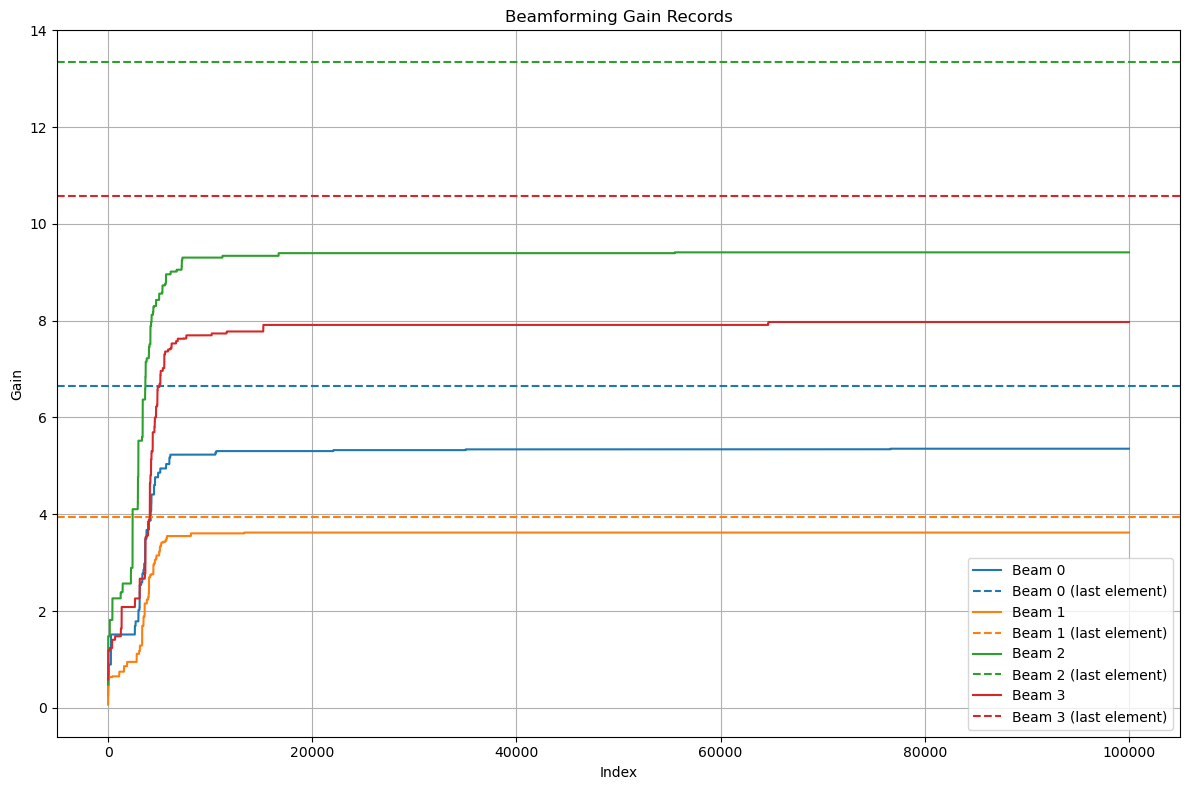

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Directory containing the numpy files
directory = r'../experiments/runs/sac__2024-07-28_20-49-12/beamforming_gain_records'

# List to store data from all files
all_data = []

# Load data from all numpy files
for i in range(4):
    filename = f'beam_{i}_gain_records.npy'
    filepath = os.path.join(directory, filename)
    data = np.load(filepath)
    all_data.append(data)

# Plotting
plt.figure(figsize=(12, 8))

for i, data in enumerate(all_data):
    # Plot all elements
    line, = plt.plot(data[:-1], label=f'Beam {i}')
    
    # Get the color of the current line
    color = line.get_color()
    
    # Plot the last element as a horizontal dashed line
    plt.axhline(y=data[-1], color=color, linestyle='--', 
                label=f'Beam {i} (last element)')

plt.xlabel('Index')
plt.ylabel('Gain')
plt.title('Beamforming Gain Records')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import os

# Directory containing the numpy files
directory = r'../experiments/runs/sac__2024-07-28_20-49-12/beamforming_gain_records'

# List to store data from all files
all_data = []

# Load data from all numpy files
for i in range(4):
    filename = f'beam_{i}_gain_records.npy'
    filepath = os.path.join(directory, filename)
    data = np.load(filepath)
    all_data.append(data)

# List to store percentage differences
percentages = []

# Compute percentage difference for each array
for i, data in enumerate(all_data):
    max_value = np.max(data[:-1])
    last_value = data[-1]
    # Compute the difference

    
    # Compute the percentage difference
    percentage_diff = (max_value / last_value) * 100
    
    percentages.append(percentage_diff)
    
    print(f"Beam {i}:")
    print(f"  Max value: {max_value}")
    print(f"  Last value: {last_value}")

    print(f"  Percentage difference: {percentage_diff:.2f}%")
    

# Compute the mean of the percentages
mean_percentage = round(np.mean(percentages))

print(f"Mean percentage difference across all beams: {mean_percentage:.2f}%")

In [2]:
import os 
os.chdir('../src/Codebook_Learning_RL')

In [66]:
from DataPrep import dataPrep
import numpy as np
options = {
        'gpu_idx': 0,
        'num_ant': 32,
        'num_bits': 4,
        'num_NNs': 4,  # codebook size
        'ch_sample_ratio': 0.5,
        'num_loop': 400,  # outer loop
        'target_update': 3,
        'path': './grid1101-1400.mat',
        'clustering_mode': 'random',
    }

ch = dataPrep('grid201-300.mat')
# ch = np.concatenate((ch[:, :options['num_ant']],
#                      ch[:, int(ch.shape[1] / 2):int(ch.shape[1] / 2) + options['num_ant']]), axis=1)

In [67]:
int(ch.shape[1] / 2)

32

In [63]:
ch[:,32:]

array([[-1.01610472e-04,  2.59507378e-05,  7.89261103e-05, ...,
        -2.38747147e-04,  6.56595148e-05,  1.52642548e-04],
       [ 4.87873258e-05, -1.78974369e-06, -9.02015163e-05, ...,
         1.78902599e-04, -1.47984829e-04, -1.10644251e-05],
       [-4.83483454e-05,  3.68424080e-05,  6.32528099e-05, ...,
        -1.96220644e-05,  1.04820334e-04, -7.51539628e-05],
       ...,
       [-5.66932649e-05,  7.70241240e-06,  5.58227366e-05, ...,
        -1.27892126e-04, -8.99914266e-06,  1.83723183e-04],
       [ 6.59787256e-05, -7.35505018e-05,  1.30613971e-05, ...,
         1.99962145e-04, -7.77191963e-05, -1.75521054e-04],
       [-6.44961801e-06,  8.17102264e-05, -8.88937648e-05, ...,
        -2.14211075e-04,  1.72753964e-04,  1.00513978e-04]])

In [60]:
ch[:, int(ch.shape[1] / 2):int(ch.shape[1] / 2) + options['num_ant']]

array([[-1.01610472e-04,  2.59507378e-05,  7.89261103e-05, ...,
        -2.38747147e-04,  6.56595148e-05,  1.52642548e-04],
       [ 4.87873258e-05, -1.78974369e-06, -9.02015163e-05, ...,
         1.78902599e-04, -1.47984829e-04, -1.10644251e-05],
       [-4.83483454e-05,  3.68424080e-05,  6.32528099e-05, ...,
        -1.96220644e-05,  1.04820334e-04, -7.51539628e-05],
       ...,
       [-5.66932649e-05,  7.70241240e-06,  5.58227366e-05, ...,
        -1.27892126e-04, -8.99914266e-06,  1.83723183e-04],
       [ 6.59787256e-05, -7.35505018e-05,  1.30613971e-05, ...,
         1.99962145e-04, -7.77191963e-05, -1.75521054e-04],
       [-6.44961801e-06,  8.17102264e-05, -8.88937648e-05, ...,
        -2.14211075e-04,  1.72753964e-04,  1.00513978e-04]])

In [56]:
int(ch.shape[1] / 2)

32

In [49]:
ch[:, :options['num_ant']].shape

(20100, 32)

In [33]:
ch

array([[ 9.27075016e-05, -2.36417414e-04,  1.26670668e-04, ...,
        -2.38747147e-04,  6.56595148e-05,  1.52642548e-04],
       [ 5.50765144e-05,  1.42950157e-04, -1.83335374e-04, ...,
         1.78902599e-04, -1.47984829e-04, -1.10644251e-05],
       [-1.69127088e-04,  2.67347968e-05,  1.20804885e-04, ...,
        -1.96220644e-05,  1.04820334e-04, -7.51539628e-05],
       ...,
       [ 8.96719066e-05, -1.46702354e-04,  5.52168967e-05, ...,
        -1.27892126e-04, -8.99914266e-06,  1.83723183e-04],
       [ 1.95835855e-05,  1.09768967e-04, -1.25143531e-04, ...,
         1.99962145e-04, -7.77191963e-05, -1.75521054e-04],
       [-1.06465515e-04, -1.56867281e-05,  1.14966948e-04, ...,
        -2.14211075e-04,  1.72753964e-04,  1.00513978e-04]])

In [64]:
ch = dataPrep('grid1101-1400.mat')
ch = np.concatenate((ch[:, :options['num_ant']],
                     ch[:, int(ch.shape[1] / 2):int(ch.shape[1] / 2) + options['num_ant']]), axis=1)

In [65]:
ch.shape

(15000, 64)

In [41]:
ch

array([[ 0.48626907, -0.55000621,  0.4941392 , ...,  0.16472712,
        -0.37537349,  0.51130232],
       [-0.28977588, -0.18938227,  0.61943828, ...,  0.02456328,
        -0.38436164,  0.64313971],
       [-0.46617064,  0.16765504,  0.18238731, ..., -0.20526134,
        -0.2679095 ,  0.67742182],
       ...,
       [ 0.07198347, -0.03347405, -0.00405505, ..., -0.22963831,
         0.20035529, -0.18130765],
       [ 0.02510182, -0.05585057,  0.07754475, ...,  0.12788274,
        -0.10571014,  0.07215254],
       [-0.16167796,  0.17000689, -0.18769421, ...,  0.07512732,
        -0.10816317,  0.13988999]])

In [18]:
import scipy.io

# Define the filename
filename = 'grid1101-1400.mat'

# Load the .mat file
try:
    mat_contents = scipy.io.loadmat(filename)


    # Access the data
    resultTable = mat_contents['resultTable']

    # Display the shape of the data to confirm
    print(resultTable.shape)

    # Display the data (optional)
    print(resultTable)
except Exception as e:
    print(f"Error loading .mat file: {e}")

Error loading .mat file: Please use HDF reader for matlab v7.3 files, e.g. h5py


In [14]:
import scipy.io

# Define the filename
filename = 'grid201-300.mat'

# Load the .mat file
try:
    mat_contents = scipy.io.loadmat(filename)


    # Access the data
    resultTable = mat_contents['resultTable']

    # Display the shape of the data to confirm
    print(resultTable.shape)

    # Display the data (optional)
    print(resultTable)
except Exception as e:
    print(f"Error loading .mat file: {e}")

(32, 20100)
[[ 9.27075016e-05-1.01610472e-04j  5.50765144e-05+4.87873258e-05j
  -1.69127088e-04-4.83483454e-05j ...  8.96719066e-05-5.66932649e-05j
   1.95835855e-05+6.59787256e-05j -1.06465515e-04-6.44961801e-06j]
 [-2.36417414e-04+2.59507378e-05j  1.42950157e-04-1.78974369e-06j
   2.67347968e-05+3.68424080e-05j ... -1.46702354e-04+7.70241240e-06j
   1.09768967e-04-7.35505018e-05j -1.56867281e-05+8.17102264e-05j]
 [ 1.26670668e-04+7.89261103e-05j -1.83335374e-04-9.02015163e-05j
   1.20804885e-04+6.32528099e-05j ...  5.52168967e-05+5.58227366e-05j
  -1.25143531e-04+1.30613971e-05j  1.14966948e-04-8.88937648e-05j]
 ...
 [ 4.43387689e-05-2.38747147e-04j -8.11022182e-05+1.78902599e-04j
   3.14712925e-05-1.96220644e-05j ...  1.27357853e-04-1.27892126e-04j
  -1.23319856e-04+1.99962145e-04j  7.25255086e-05-2.14211075e-04j]
 [-7.01897588e-05+6.56595148e-05j  1.34904025e-04-1.47984829e-04j
  -1.42066943e-04+1.04820334e-04j ...  9.00443847e-05-8.99914266e-06j
  -3.42777603e-05-7.77191963e-05j  

In [24]:
from torchrl.data import TensorDictReplayBuffer, LazyMemmapStorage,  LazyTensorStorage
import torch
from tensordict import TensorDict
from torchrl.data.replay_buffers.samplers import (
    SamplerWithoutReplacement,
    RandomSampler,
    PrioritizedSampler,
)
# storage = LazyMemmapStorage(1000,device=torch.device("cuda:0"))
batch_transition = TensorDict(
            {
                "observations": torch.rand(32),
                "next_observations": torch.rand(32),
                "actions": torch.rand(32),
                "rewards": torch.rand(32),
                "dones": torch.rand(32),
            },
            batch_size=[32],
        )
storage = LazyTensorStorage(100,device=torch.device("cuda:0"))
buffer = TensorDictReplayBuffer(
            storage=storage, sampler=RandomSampler()
        )
buffer.extend(batch_transition)
batch_transition = TensorDict(
            {
                "observations": torch.rand(1),
                "next_observations": torch.rand(1),
                "actions": torch.rand(1),
                "rewards": torch.rand(1),
                "dones": torch.rand(1),
            },
            batch_size=[1],
        )
buffer.extend(batch_transition)

tensor([32])

In [25]:
len(buffer)

33

In [26]:
buffer.sample(1)

TensorDict(
    fields={
        actions: Tensor(shape=torch.Size([1]), device=cuda:0, dtype=torch.float32, is_shared=True),
        dones: Tensor(shape=torch.Size([1]), device=cuda:0, dtype=torch.float32, is_shared=True),
        index: Tensor(shape=torch.Size([1]), device=cuda:0, dtype=torch.int64, is_shared=True),
        next_observations: Tensor(shape=torch.Size([1]), device=cuda:0, dtype=torch.float32, is_shared=True),
        observations: Tensor(shape=torch.Size([1]), device=cuda:0, dtype=torch.float32, is_shared=True),
        rewards: Tensor(shape=torch.Size([1]), device=cuda:0, dtype=torch.float32, is_shared=True)},
    batch_size=torch.Size([1]),
    device=cuda:0,
    is_shared=True)